In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks', rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [2]:
threshold = !python ../workflow/scripts/count_patterns.py --threshold ../out/associations/pe_urinaire/unitigs_patterns.txt
threshold = float(threshold[0])

In [3]:
import numpy as np
import pandas as pd

In [4]:
def parse_gff(infile, start_i, stop_i, genes):
    with open(infile, 'r') as gff:
        
        for line in gff:
            if line.lstrip().startswith('##FASTA'):
                # start of FASTA entries, end of file
                break
            
            elif line.lstrip().startswith('#'):
                # comment, ignore
                continue
            
            # should be a valid GFF3 line
            entries = line.split('\t')
            
            try:
                chrom = entries[0]
                
                start = round(int(entries[3]) / 1_000_000, 3)
                end = round(int(entries[4]) / 1_000_000, 3)
                
                if start >= start_i and end <= stop_i:
                    ID = ''
                    locus = ''
                    name = ''
                    for entry in entries[8].split(';'):
                        if entry.startswith('ID') and '=' in entry:
                            ID = entry.split('=')[1]
                        elif entry.startswith('locus_tag') and '=' in entry:
                            locus = entry.split('=')[1]
                        elif entry.startswith('gene') and '=' in entry:
                            name = entry.split('=')[1]
                    
                    if locus in genes:
                        print(f'{name}\t{locus}')
                
            except Exception as e:
                print(e)

In [5]:
phenotypes = ['deces', 'choc', 'passage_en_rea',
              'pe_urinaire', 'pe_digestive']

In [6]:
references = ["ED1a", "IAI1", "IAI39", "K-12", "UMN026", "UTI89", "CFT073", "536"]

In [7]:
references = ["IAI39", "K-12"]

IAI39
K-12


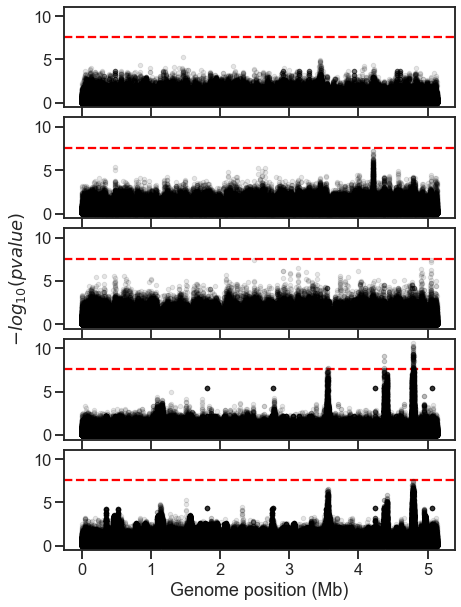

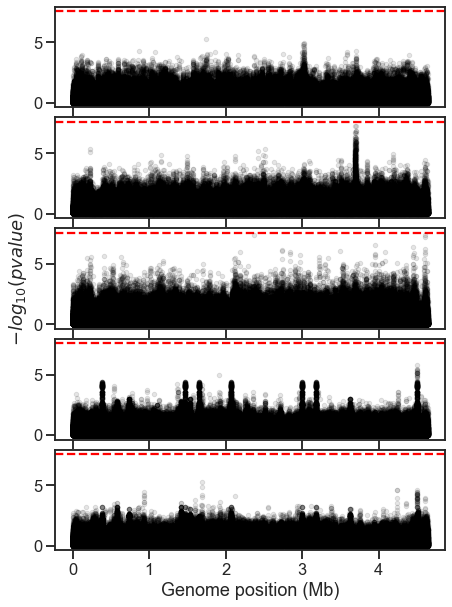

In [8]:
for reference in references:
    print(reference)

    fig, axs = plt.subplots(len(phenotypes), 1, figsize=(7, 2 * len(phenotypes)),
                        constrained_layout=False,
                        sharex=True, sharey=True)
    
    for i, (phenotype, ax) in enumerate(zip(phenotypes, axs.flat)):
        u = pd.read_csv(f'../out/associations/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
        m = pd.read_csv(f'../out/associations/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
        m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
        a = u.join(m, how='inner')

        ax.plot(a['pos'], -np.log10(a['lrt-pvalue']), 'k.', alpha=0.1, rasterized=True)

        ax.axhline(-np.log10(threshold), color='r', ls='dashed', zorder=-1)

        # ax.set_title(phenotype)
        if i == 2:
            ax.set_ylabel('$-log_{10}(pvalue)$')

    ax.set_xlabel('Genome position (Mb)')
    fig.subplots_adjust(wspace=0, hspace=0.1)

    plt.savefig(f'manhattan_{reference}.png',
                dpi=300,
                bbox_inches='tight',
                transparent=True)
    plt.savefig(f'manhattan_{reference}.svg',
                dpi=300, bbox_inches='tight',
                transparent=True)

In [8]:
pg = pd.read_csv('../out/panaroo_ref/gene_presence_absence_roary.csv',
                 sep=',', low_memory=False,
                 index_col=0)
pg.drop(list(pg.columns[:13]), axis=1, inplace=True)

In [9]:
phenotype = 'deces'
reference = 'IAI39'

u = pd.read_csv(f'../out/associations/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
m = pd.read_csv(f'../out/associations/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
a = u.join(m, how='inner')

genes = set()
for gene in a[a['lrt-pvalue'] < 1E-6].sort_values('lrt-pvalue')[[6, 7, 8]].values.flatten():
    if str(gene) == 'nan':
        continue
    for idx, row in pg[['IAI39']].dropna().iterrows():
        if gene in row['IAI39']:
            genes.add(idx)
            break

genes

set()

In [10]:
phenotype = 'choc'
reference = 'IAI39'

u = pd.read_csv(f'../out/associations/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
m = pd.read_csv(f'../out/associations/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
a = u.join(m, how='inner')

genes = set()
for gene in a[a['lrt-pvalue'] < 1E-6].sort_values('lrt-pvalue')[[6, 7, 8]].values.flatten():
    if str(gene) == 'nan':
        continue
    for idx, row in pg[['IAI39']].dropna().iterrows():
        if gene in row['IAI39']:
            genes.add(idx)
            break

genes

{'bcsE', 'bcsG', 'bcsQ', 'group_2739', 'group_3368'}

In [11]:
a['round'] = [round(x, 3) for x in a['pos']]

In [12]:
sorted(set(a[a['lrt-pvalue'] <= 1E-6]['round'].values))

[4.207, 4.208, 4.21, 4.211, 4.212]

In [13]:
genes = set(a[a['lrt-pvalue'] <= 1E-6].sort_values('lrt-pvalue')[[6, 7, 8]].values.flatten())

In [14]:
parse_gff('../data/references/IAI39/IAI39.gff', 4.207, 4.212, genes)

bcsQ	ECIAI39_RS20275
	ECIAI39_RS20280
bcsE	ECIAI39_RS20285
bcsG	ECIAI39_RS20295


In [9]:
phenotype = 'choc'
reference = 'IAI39'

u = pd.read_csv(f'../out/associations/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
m = pd.read_csv(f'../out/associations/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
a = u.join(m, how='inner')

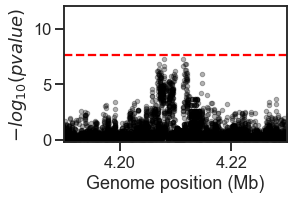

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5),
                       constrained_layout=False,
                       sharey=True)

ax.plot(a['pos'], -np.log10(a['lrt-pvalue']), 'k.', alpha=0.3, rasterized=True)

ax.axhline(-np.log10(threshold), color='r', ls='dashed', zorder=-1)

ax.set_ylabel('$-log_{10}(pvalue)$')

ax.set_xlabel('Genome position (Mb)')

ax.set_xlim(4.19, 4.23)
ax.set_ylim(-0.25, 12)

plt.savefig(f'zoom_{reference}_{phenotype}.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig(f'zoom_{reference}_{phenotype}.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [17]:
phenotype = 'passage_en_rea'
reference = 'IAI39'

u = pd.read_csv(f'../out/associations/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
m = pd.read_csv(f'../out/associations/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
a = u.join(m, how='inner')

genes = set()
for gene in a[a['lrt-pvalue'] < threshold].sort_values('lrt-pvalue')[[6, 7, 8]].values.flatten():
    if str(gene) == 'nan':
        continue
    for idx, row in pg[['IAI39']].dropna().iterrows():
        if gene in row['IAI39']:
            genes.add(idx)
            break

genes

set()

In [11]:
phenotype = 'pe_urinaire'
reference = 'IAI39'

u = pd.read_csv(f'../out/associations/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
m = pd.read_csv(f'../out/associations/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
a = u.join(m, how='inner')

genes = set()
for gene in set(a[a['lrt-pvalue'] <= threshold].sort_values('lrt-pvalue')[[6, 7, 8]].values.flatten()):
    if str(gene) == 'nan':
        continue
    for idx, row in pg[['IAI39']].dropna().iterrows():
        if gene in row['IAI39']:
            genes.add(idx)
            break

genes

{'group_297',
 'group_3075',
 'group_3240',
 'group_3241',
 'group_3379',
 'group_3836',
 'group_3837',
 'group_4156'}

In [12]:
a['round'] = [round(x, 3) for x in a['pos']]

In [13]:
sorted(set(a[a['lrt-pvalue'] <= threshold]['round'].values))

[3.553, 4.365, 4.785, 4.787, 4.79, 4.792, 4.793, 4.794, 4.796]

In [14]:
genes = set(a[a['lrt-pvalue'] <= threshold].sort_values('lrt-pvalue')[[6, 7, 8]].values.flatten())

In [15]:
parse_gff('../data/references/IAI39/IAI39.gff', 3.55, 3.56, genes)

In [16]:
parse_gff('../data/references/IAI39/IAI39.gff', 4.36, 4.37, genes)

	ECIAI39_RS21015


In [17]:
parse_gff('../data/references/IAI39/IAI39.gff', 4.78, 4.80, genes)

	ECIAI39_RS22975
papH	ECIAI39_RS22990
	ECIAI39_RS23000
papF	ECIAI39_RS23020
papG-II	ECIAI39_RS23025
	ECIAI39_RS23030
	ECIAI39_RS23035


In [18]:
phenotype = 'pe_urinaire'
reference = 'IAI39'

u = pd.read_csv(f'../out/associations/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
m = pd.read_csv(f'../out/associations/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
a = u.join(m, how='inner')

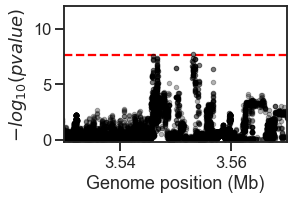

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5),
                        constrained_layout=False,
                        sharey=True)

ax.plot(a['pos'], -np.log10(a['lrt-pvalue']), 'k.', alpha=0.3, rasterized=True)

ax.axhline(-np.log10(threshold), color='r', ls='dashed', zorder=-1)

ax.set_ylabel('$-log_{10}(pvalue)$')
ax.set_xlabel('Genome position (Mb)')

ax.set_xlim(3.53, 3.57)
ax.set_ylim(-0.25, 12)

plt.savefig(f'zoom_{reference}_{phenotype}_1.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig(f'zoom_{reference}_{phenotype}_1.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

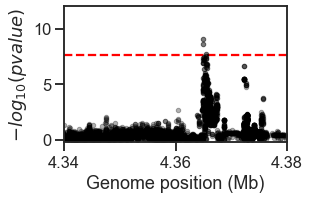

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5),
                        constrained_layout=False,
                        sharey=True)

ax.plot(a['pos'], -np.log10(a['lrt-pvalue']), 'k.', alpha=0.3, rasterized=True)

ax.axhline(-np.log10(threshold), color='r', ls='dashed', zorder=-1)

ax.set_ylabel('$-log_{10}(pvalue)$')
ax.set_xlabel('Genome position (Mb)')

ax.set_xlim(4.34, 4.38)
ax.set_ylim(-0.25, 12)

plt.savefig(f'zoom_{reference}_{phenotype}_2.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig(f'zoom_{reference}_{phenotype}_2.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

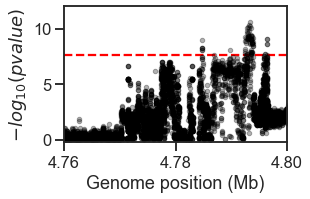

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5),
                        constrained_layout=False,
                        sharey=True)

ax.plot(a['pos'], -np.log10(a['lrt-pvalue']), 'k.', alpha=0.3, rasterized=True)

ax.axhline(-np.log10(threshold), color='r', ls='dashed', zorder=-1)

ax.set_ylabel('$-log_{10}(pvalue)$')
ax.set_xlabel('Genome position (Mb)')

ax.set_xlim(4.76, 4.80)
ax.set_ylim(-0.25, 12)

plt.savefig(f'zoom_{reference}_{phenotype}_3.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig(f'zoom_{reference}_{phenotype}_3.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [29]:
phenotype = 'pe_digestive'
reference = 'IAI39'

u = pd.read_csv(f'../out/associations/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
m = pd.read_csv(f'../out/associations/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
a = u.join(m, how='inner')

genes = set()
for gene in set(a[a['lrt-pvalue'] <= threshold].sort_values('lrt-pvalue')[[6, 7, 8]].values.flatten()):
    if str(gene) == 'nan':
        continue
    for idx, row in pg[['IAI39']].dropna().iterrows():
        if gene in row['IAI39']:
            genes.add(idx)
            break

genes

set()